In [59]:
import pgmpy
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import TreeSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianNetwork

import pandas as pd
import numpy as np

import time

import networkx as nx
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('german.csv')

In [53]:
non_label_attrs = ['status', 'duration', 'credit-history', 'purpose', 'credit-amount', 'saving-account', 'employment', 'installment-rate', 'sex-marst', 'other-debtors', 'residence', 'property', 'age', 'other-installment-plans', 'housing', 'existing-credits', 'job', 'people-liable', 'telephone', 'foreign-worker']
label_attr = 'good-credit'

In [23]:
est = TreeSearch(data=df)
estimated_model = est.estimate(estimator_type="chow-liu")

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

In [36]:
est = PC(data=df)
estimated_model = est.estimate()

  0%|          | 0/5 [00:00<?, ?it/s]

/home/yuchao/anaconda3/envs/py37/lib/python3.7/site-packages/pgmpy/base/DAG.py:1198: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  + "oriented arbitrarily."


In [60]:
est = HillClimbSearch(data=df)
estimated_model = est.estimate(scoring_method=BicScore(df))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [54]:
est = HillClimbSearch(data=df[non_label_attrs])
estimated_model = est.estimate()
for non_label_attr in non_label_attrs:
    estimated_model.add_edge(non_label_attr, label_attr)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [35]:
tstart = time.time()
est = MmhcEstimator(data=df)
estimated_model = est.estimate()
tend = time.time()
print(tstart-tend)

KeyboardInterrupt: 

In [40]:
estimated_model

In [50]:
estimated_model.edges()

OutEdgeView([('duration', 'credit-amount'), ('duration', 'telephone'), ('credit-history', 'other-installment-plans'), ('credit-amount', 'purpose'), ('saving-account', 'status'), ('employment', 'residence'), ('employment', 'job'), ('installment-rate', 'credit-amount'), ('other-debtors', 'property'), ('property', 'duration'), ('age', 'employment'), ('age', 'people-liable'), ('age', 'housing'), ('housing', 'property'), ('housing', 'sex-marst'), ('housing', 'residence'), ('existing-credits', 'credit-history'), ('job', 'telephone'), ('job', 'property'), ('people-liable', 'sex-marst'), ('foreign-worker', 'other-debtors'), ('foreign-worker', 'installment-rate')])

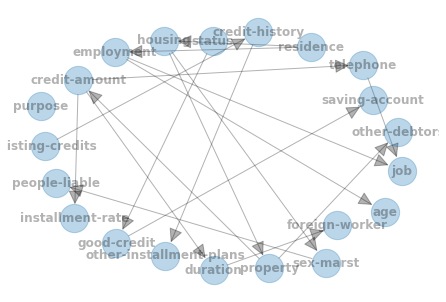

In [61]:
nx.draw(#_circular(
    estimated_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

In [57]:
model = BayesianNetwork(estimated_model.edges())
model.fit(
    df, estimator=BayesianEstimator
)
model.get_cpds()

MemoryError: Unable to allocate 6.76 TiB for an array with shape (2, 464486400000) and data type float64

In [45]:
syn_df = model.simulate(n_samples=1000000)

  0%|          | 0/21 [00:00<?, ?it/s]

/home/yuchao/anaconda3/envs/py37/lib/python3.7/site-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


In [46]:
full_attributes = ['status', 'duration', 'credit-history', 'purpose', 'credit-amount', 'saving-account', 'employment', 'installment-rate', 'sex-marst', 'other-debtors', 'residence', 'property', 'age', 'other-installment-plans', 'housing', 'existing-credits', 'job', 'people-liable', 'telephone', 'foreign-worker']
for attr in full_attributes:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
'display.max_colwidth', 1000):
        print(syn_df.groupby(attr).agg(answer=('good-credit', 'mean'), count=('good-credit', 'count')))

                                              answer   count
status                                                      
... < 0 DM                                  0.606517  268853
... >= 200 DM / salary for at least 1 year  0.880843  392742
0<= ... < 200 DM                            0.771446   63985
no checking account                         0.506002  274420
                    answer   count
duration                          
1 <= ... < 4 yrs  0.696838  623913
4 <= ... < 7 yrs  0.695496   17228
< 1 yr            0.697984  358859
                                               answer   count
credit-history                                               
all credits at this bank paid back duly      0.826745  292222
critical account/other credits elsewhere     0.413933   49880
delay in paying off in the past              0.394439   40820
existing credits paid back duly till now     0.678375   88712
no credits taken/all credits paid back duly  0.678895  528366
                       an